# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('demo01.csv', sep=',', encoding='utf-8-sig')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [7]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [8]:
df.isna().sum()
# Não possui missings

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

False    0.976577
True     0.023423
Name: mau, dtype: float64


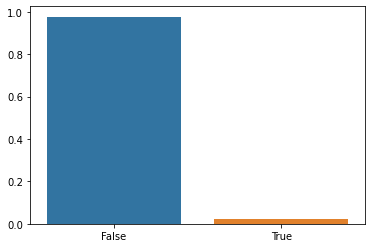

In [19]:
count = df['mau'].value_counts(normalize=True)
sns.barplot(x=count.index, y=count.values)
print(count)

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [24]:
metadata = pd.DataFrame(columns=['variavel', 'tipo_dados', 'qtd_categorias'])
for col in df.columns:
    tipo = df[col].dtype
    qtd_categorias = len(df[col].unique())
    metadata = metadata.append({'variavel': col, 'tipo_dados': tipo, 'qtd_categorias': qtd_categorias}, ignore_index=True)
display(metadata)

C:\Users\HenriqueCampos\AppData\Local\Temp\ipykernel_10988\1986326553.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'variavel': col, 'tipo_dados': tipo, 'qtd_categorias': qtd_categorias}, ignore_index=True)
C:\Users\HenriqueCampos\AppData\Local\Temp\ipykernel_10988\1986326553.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'variavel': col, 'tipo_dados': tipo, 'qtd_categorias': qtd_categorias}, ignore_index=True)
C:\Users\HenriqueCampos\AppData\Local\Temp\ipykernel_10988\1986326553.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'variavel': col, 'tipo_dados': tipo, 'qtd_categorias': qtd_categorias}, ignore_index=True)
C:\Users\H

,variavel,tipo_dados,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


In [45]:
df_encoded = pd.get_dummies(df, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

In [46]:
df_encoded['sexo'] = df_encoded['sexo'].map({'M': 0, 'F': 1})
df_encoded['posse_de_veiculo'] = df_encoded['posse_de_veiculo'].map({'N': 0, 'Y': 1})
df_encoded['posse_de_imovel'] = df_encoded['posse_de_imovel'].map({'N': 0, 'Y': 1})
df_encoded['mau'] = df_encoded['mau'].astype(int)

In [50]:
df_encoded.dtypes

sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int32
tipo_renda_Commercial associate             uint8
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8
educacao_Academic degree                    uint8
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [ ]:
# criado no item anterior

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [67]:
df_freq = df_encoded[['mau', 'possui_email', 'posse_de_veiculo']]
freq = pd.crosstab(df_freq['possui_email'], df_freq['posse_de_veiculo'])
print(df_freq.groupby('possui_email')['mau'].mean())
print(df_freq.groupby('posse_de_veiculo')['mau'].mean())
freq

possui_email
0    0.023731
1    0.020270
Name: mau, dtype: float64
posse_de_veiculo
0    0.024268
1    0.022095
Name: mau, dtype: float64


posse_de_veiculo,0,1
possui_email,,
0,9341,5829
1,837,643


é possível observar que as diferenças entre as proporções de "mau" igual a 1 para cada valor de "possui_email" e "posse_de_veiculo" são muito pequenas, por esse motivo não se pode tirar conclusões precisas sobre qual das duas iria prever melhor a probabilidade de ser um mau pagado, sendo necessário uma análise mais profunda.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [68]:
df_encoded.to_csv('demo01_tratada.csv', index=False, encoding='utf-8-sig')